# Final Project IEOR 165
Professor Anil Aswani  
Engineering Statistics, Quality Control, and Forecasting Sp. '21  
Cameron Hirsh

In [1]:
# Import Tools

import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


## Overview

### Objective

The authors of the following research paper:  

*Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis, “Modeling wine preferences by data mining
from physicochemical properties”,  
Decision Support Systems, vol. 47, no. 4:547-553, 2009.*

considered the problem of modeling wine preferences. Wine can be evaluated by experts who give a subjective score, and the question the authors of this paper considered was how to build a model that relates objective features of the wine (e.g., pH values) to its rated quality.

### Data

In [2]:
# Load df and see format

wine = pd.read_csv('winequality-red.csv')
wine.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


In [3]:
# Fix df Formatting

cols = str(list(wine.columns)).replace('"', '')
cols = cols.split(';')
rows = wine.iloc[:,0]
data = [row.split(";") for row in rows]
df = pd.DataFrame(data, columns=cols)
df.rename(columns={"['fixed acidity":"fixed acidity", "quality']":"quality"}, inplace=True)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0,2.6,0.098,25,67,0.9968,3.2,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.997,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.998,3.16,0.58,9.8,6
4,7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


### Methods

Use the following methods to identify the **coefficients** of a *linear model* **relating wine quality to
different features of the wine**: 
1. ordinary least squares (OLS)
2. ridge regression
3. lasso regression

* Make sure to include a constant (intercept) term in your model
* Choose the *tuning parameters* using **crossvalidation.**

Please include:  
1. Plots of tuning parameters versus cross-validation error
2. Tables of coefficients (labeled by the feature) computed by each method
3. The source code used to generate the plots and coefficients.

## EDA

### Check Quality Distribution

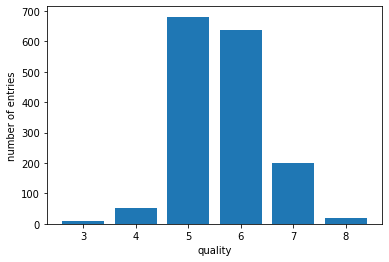

In [4]:
# Explore the Quality Feature

height = df['quality'].value_counts().values
x = list(df['quality'].value_counts().index)

height = [x for _, x in sorted(zip(x, height))]
x.sort()

plt.bar(x, height)
plt.xlabel('quality')
plt.ylabel('number of entries')
plt.show()


It seems quality ranges from 3 to 8 in this data, with 5 and 6 being the common ratings.

### Fix dtypes

In [5]:
# Change to float
df = df.astype(float)
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


### Compare Qulaity Associations with all features

In [6]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

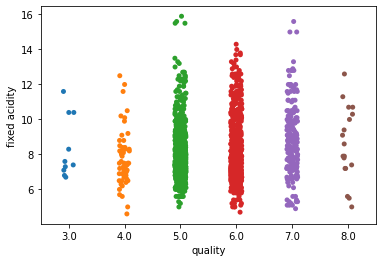

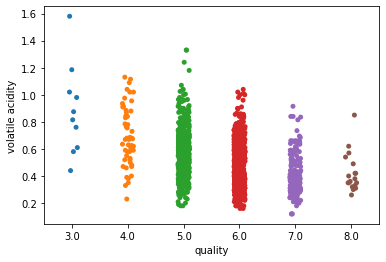

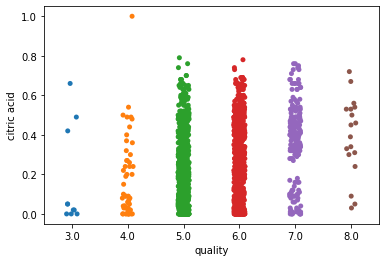

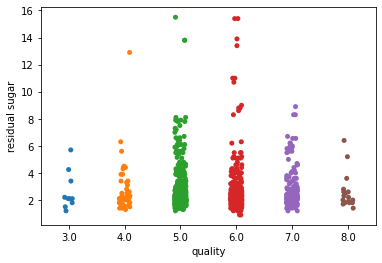

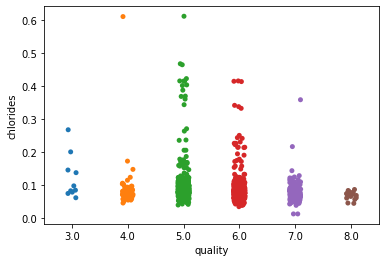

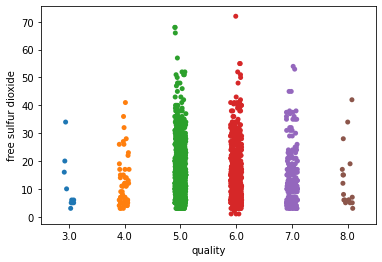

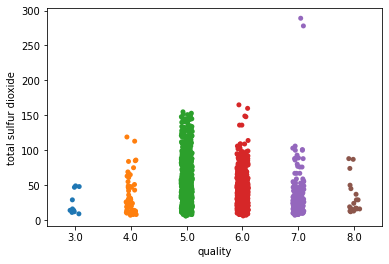

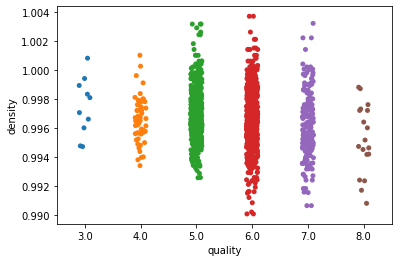

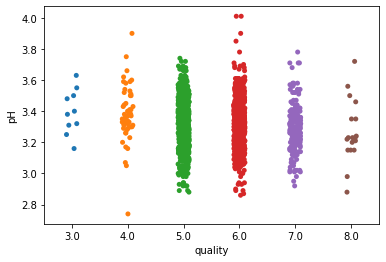

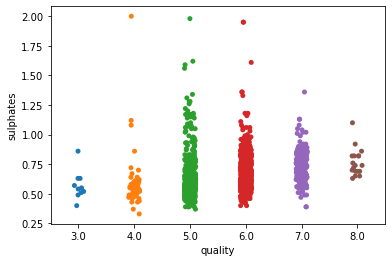

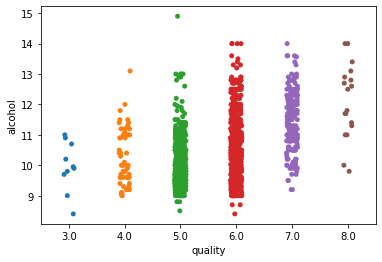

In [7]:
features = list(df.columns[:len(df.columns) - 1])
for feature in features:
    sns.stripplot(data=df, x="quality", y=feature)
    plt.show()

Cannot tell for sure, but there looks to be relatively linear relationships between most of the features and our taget. Doing Linear Regression with all features should yield promising results.

## Linear Models

In [8]:
# Set X, Y, Constant
Y = df.loc[:,"quality"]
X = df.loc[:, df.columns != "quality"]
X['intercept'] = [1] * len(X)

features = list(df.columns[:len(df.columns) - 1])
features.append("intercept")


### 1: Ordinary Least Squares (OLS)

In [9]:
# Using sklearn
# No hyperparameters in OLS (Plain Linear Regression), No tuning to do for this one

lr_model = LinearRegression()
lr_model.fit(X, Y)
lr_coeffs = lr_model.coef_


lr_coeff_table = pd.DataFrame(data={'feature': features, 'linear model coefficient': lr_coeffs})
lr_coeff_table

,feature,linear model coefficient
0,fixed acidity,0.024991
1,volatile acidity,-1.083590
2,citric acid,-0.182564
3,residual sugar,0.016331
4,chlorides,-1.874225
5,free sulfur dioxide,0.004361
6,total sulfur dioxide,-0.003265
7,density,-17.881164
8,pH,-0.413653
9,sulphates,0.916334


### 2: Ridge Regression (RR)

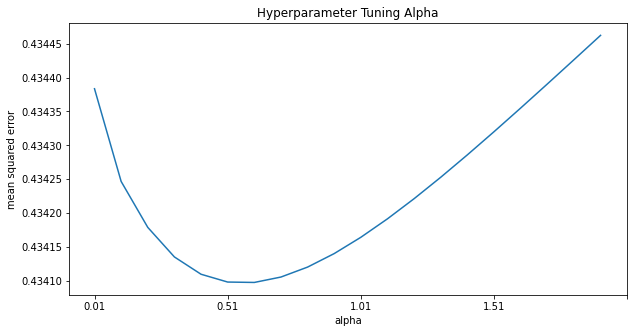

The optimal alpha is 0.61


,alpha,error
0,0.01,-0.434384
1,0.11,-0.434247
2,0.21,-0.434179
3,0.31,-0.434136
4,0.41,-0.434110
5,0.51,-0.434099
6,0.61,-0.434098
7,0.71,-0.434106
8,0.81,-0.434121
9,0.91,-0.434140


In [10]:
# Using sklearn
# Hyperparameter tuning: alpha
# cross_val_score: takes care of splitting data using cv parameter

alphas = np.arange(0.01, 2, 0.1)
errors = []
for alpha in alphas:
    rr_model = Ridge(alpha=alpha)
    scores = cross_val_score(rr_model, X, Y, cv=10, scoring="neg_mean_squared_error")
    mean_error = scores.mean()
    errors.append(mean_error)

    
x = list(map(str, alphas))
y = np.asarray(errors) * -1


plt.figure(figsize=(10, 5))
plt.plot(x, y)

plt.title('Hyperparameter Tuning Alpha')
plt.xlabel('alpha')
plt.ylabel('mean squared error')
plt.xticks(np.arange(0, len(x)+1, 5))
plt.show()

print("The optimal alpha is " + str(alphas[errors.index(max(errors))])[:4])
display(pd.DataFrame({'alpha':alphas, 'error': errors}))

In [20]:
# Using optimal choice, Fit model and report coeffs

rr_model = Ridge(alpha=0.61)
rr_model.fit(X, Y)
rr_coeffs = rr_model.coef_


rr_coeff_table = pd.DataFrame(data={'feature': features, 'linear model coefficient': rr_coeffs})
rr_coeff_table

,feature,linear model coefficient
0,fixed acidity,0.011903
1,volatile acidity,-1.106026
2,citric acid,-0.196724
3,residual sugar,0.008023
4,chlorides,-1.518794
5,free sulfur dioxide,0.004489
6,total sulfur dioxide,-0.003244
7,density,-0.031307
8,pH,-0.459182
9,sulphates,0.842147


### 3: Lasso Regression (LaReg? :))

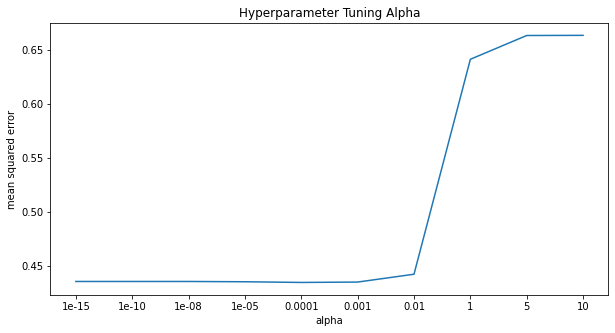

The optimal alpha is 0.0001


,alpha,error
0,1.000000e-15,-0.435185
1,1.000000e-10,-0.435185
2,1.000000e-08,-0.435185
3,1.000000e-05,-0.434921
4,1.000000e-04,-0.434281
5,1.000000e-03,-0.434639
6,1.000000e-02,-0.441915
7,1.000000e+00,-0.641582
8,5.000000e+00,-0.663673
9,1.000000e+01,-0.663803


In [21]:
# Using sklearn
# Hyperparameter tuning: alpha
# cross_val_score: takes care of splitting data using cv parameter

alphas = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]
errors = []
for alpha in alphas:
    la_model = Lasso(alpha=alpha, max_iter=100000)
    scores = cross_val_score(la_model, X, Y, cv=10, scoring="neg_mean_squared_error")
    mean_error = scores.mean()
    errors.append(mean_error)

    
x = list(map(str, alphas))
y = np.asarray(errors) * -1


plt.figure(figsize=(10, 5))
plt.plot(x, y)

plt.title('Hyperparameter Tuning Alpha')
plt.xlabel('alpha')
plt.ylabel('mean squared error')
# plt.xticks(np.arange(0, len(x)+1, 5))
plt.show()

print("The optimal alpha is " + str(alphas[errors.index(max(errors))]))
display(pd.DataFrame({'alpha':alphas, 'error': errors}))

In [22]:
# Using optimal choice, Fit model and report coeffs

la_model = Ridge(alpha=0.0001)
la_model.fit(X, Y)
la_coeffs = la_model.coef_


la_coeff_table = pd.DataFrame(data={'feature': features, 'linear model coefficient': la_coeffs})
la_coeff_table

,feature,linear model coefficient
0,fixed acidity,0.023303
1,volatile acidity,-1.084882
2,citric acid,-0.182672
3,residual sugar,0.015591
4,chlorides,-1.877405
5,free sulfur dioxide,0.004377
6,total sulfur dioxide,-0.003269
7,density,-16.088708
8,pH,-0.422729
9,sulphates,0.913975


### 4: Compare

In [23]:
comparison = pd.DataFrame(data={'feature':features, 'OLS':lr_coeffs, 'Ridge':rr_coeffs, 'Lasso':la_coeffs})
comparison

,feature,OLS,Ridge,Lasso
0,fixed acidity,0.024991,0.011903,0.023303
1,volatile acidity,-1.083590,-1.106026,-1.084882
2,citric acid,-0.182564,-0.196724,-0.182672
3,residual sugar,0.016331,0.008023,0.015591
4,chlorides,-1.874225,-1.518794,-1.877405
5,free sulfur dioxide,0.004361,0.004489,0.004377
6,total sulfur dioxide,-0.003265,-0.003244,-0.003269
7,density,-17.881164,-0.031307,-16.088708
8,pH,-0.413653,-0.459182,-0.422729
9,sulphates,0.916334,0.842147,0.913975
